## K-NN近邻算法

K-NN近邻算法或者说K最近邻(kNN，k-NearestNeighbor)分类算法是数据挖掘分类技术中最简单的方法之一。所谓K最近邻，就是k个最近的邻居的意思，说的是每个样本都可以用它最接近的k个邻居来代表。

kNN算法的核心思想是如果一个样本在特征空间中的k个最相邻的样本中的大多数属于某一个类别，则该样本也属于这个类别，并具有这个类别上样本的特性。该方法在确定分类决策上只依据最邻近的一个或者几个样本的类别来决定待分样本所属的类别。 kNN方法在类别决策时，只与极少量的相邻样本有关。由于kNN方法主要靠周围有限的邻近的样本，而不是靠判别类域的方法来确定所属类别的，因此对于类域的交叉或重叠较多的待分样本集来说，kNN方法较其他方法更为适合。

### k-Nearest Neighbors（KNN）

在本章中，我们将介绍k-Nearest Neighbors（KNN），一个简单的用于分类和回归任务的算法。KNN看上去如此简单，一直很容易小视它的力量。它被广泛应用于现实世界中的各种场景，包括搜索和推荐系统。 下面我们将对KNN与简单的线性回归进行比较和对照，并通过案例来帮助大家理解模型。

KNN是回归分类任务的简单模型。它的名称很简单并且直接描述了它的大部分学习算法的精髓。标点邻居是度量空间中训练实例的表示，度量空间是一个特征空间，其中定义了一个集合的所有成员之间的相对距离。 在上一章的住房价格的案例中，我们在度量空间中对训练用实例进行了表示，所有住房价格之间的距离已得到了定义。这些邻近样本数据被用于估计测试实例的对应的值。 超参数k指定在估计中可以使用多少邻居。 超参数是控制算法学习的参数。 超参数不是从训练数据估计而得的，通常需要经过手动进行设置。K值代表的是选择的k个最接近测试实例的k个邻近样本，其邻近成都可以通过一些距离函数测量。

对于分类任务而言，训练集由包含特征向量和类标签的一组元组组成。 KNN能够进行二叉、多类和多标签分类，我们稍后将涉及到这些任务，本章将重点介绍二叉分类。 最简单的KNN分类器使用KNN标签的模式对测试实例进行分类。当然，这里可以使用其他策略来达到目标。k通常被设置为奇数以防止half-half困境（某测试样本的K近邻中一半样本是正样本，一半样本是负样本，没法进行该分类。另外一般而言，如果类别个数为偶数，那么K通常会设置为一个奇数；如果类别个数为奇数，K通常设置为偶数，这样就能保证不会有平局的发生）。在回归任务中，特征向量每个都与一个响应变量相关联，该变量采用一个实数标量而不是一个标签。预测是KNN响应变量的平均值或加权平均值。

## 惰性学习和非参数模型

KNN是一个惰性的机器学习算法，也称为基于实例的学习算法，惰性学习算法在对训练数据集进行存储的时候，对数据只做很少处理或者干脆不做任何处理。 与诸如简单线性回归那用的积极学习算法相反，KNN在训练阶段进行基于训练数据的泛化过程中不对模型进行参数估计。惰性学习算法有优缺点，训练一个积极的学习算法通常需要昂贵的计算开销，但是由此产生的模型的预测往往性价比很高。对于简单的线性回归而言，预测仅需要将学习系数乘以特征，然后再加上训练的到的截距参数即可。而惰性学习算法几乎可以立即展开预测，但预测成本往往可能是昂贵的。比如在最简单的KNN实现中，为了做出预测，需要计算测试实例和所有训练实例之间的距离。

与我们后面将要讨论的大多数其他模型相反，KNN是非参数的模型。参数模型使用固定数量的参数或系数，通过总的数据输出，对模型进行定义。参数的数量与训练实例的数量无关。说KNN是非参数模式似乎也并不恰当，因为KNN模型并非没有参数。这么说的原因是非参数意味着模型的参数数量不是固定的，并且可能随培训实例的数量而增长。

当训练数据丰富，且我们对响应变量与解释变量之间关系的知识知之甚少的时候，采用KNN这样的非参数模型进行机器学习通常还是很有用的。KNN只有一个假设：彼此靠近的实例可能具有类似的响应变量值。非参数模型所具有的灵活性并不总是分析者所期望的：如果培训数据很少或者您已经对解释变量与响应变量之间的关系有所了解，那么基于假设关系而建构的学习模型可能会更有用。

## 应用1：基于KNN的分类

这里稍微花点时间回顾一下之前学习到的内容，分类任务的目标是使用一个或多个特征来预测离散响应变量的值。这里我们尝试做一个对玩具进行分类的任务。 假设你需要以一个人的身高和体重为数据来预测他或她的性别。这种类型的问题通常被称为二叉分类，因为响应变量总是非此即彼的两个标签之一。 

下表给出了9个训练实例数据：

|Height|Weight|Label|
|--|--|--|
|158 cm|64 kg|male|
|170 cm|86 kg|male|
|183 cm|84 kg|male|
|191 cm|80 kg|male|
|155 cm|49 kg|female|
|163 cm|59 kg|female|
|180 cm|67 kg|female|
|158 cm|54 kg|female|
|170 cm|67 kg|female|

与前面讲过的简单线性回归问题不同，我们现在使用两个解释变量的特征来预测响应变量的值。当然，基于KNN的学习绝对不限于两个特征，该算法可以使用任意数量的特征。但是由于人类认知能力的局限，在对数据进行可视化的时候，没法更有效的显示三个以上的特征。这里我们通过调用matplotlib来创建散点图进行数据的可视化。

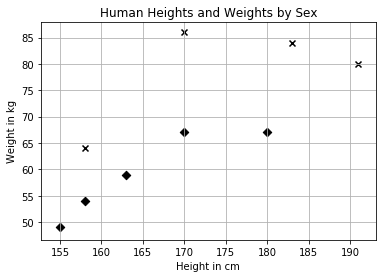

In [1]:
import numpy as np
import matplotlib.pyplot as plt

X_train = np.array([
    [158, 64],
    [170, 86],
    [183, 84],
    [191, 80],
    [155, 49],
    [163, 59],
    [180, 67],
    [158, 54],
    [170, 67]
])
y_train = ['male', 'male', 'male', 'male', 'female', 'female', 'female', 'female', 'female']

plt.figure()
plt.title('Human Heights and Weights by Sex')
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')

for i, x in enumerate(X_train):
    plt.scatter(x[0], x[1], c='k', marker='x' if y_train[i] == 'male' else 'D')
plt.grid(True)
plt.show()

从图中我们可以看到，由x标记表示的男人往往比女性具有更高的身体和更大的体重。这个观察结果可能与大家的经验一致。现在我们来使用KNN来预测一个给定身高和重量数据的个体的性别是男性还是女性。在这里我们先给出一对数据，假设我们想预测一个身高155厘米，体重70公斤的人的性别，首先，我们必须定义预测所需要的距离数据的度量原则。在这个预测场景中，我们建议使用欧氏距离 - 欧几里德空间中的点与点之间的直线距离来作为计算样本距离的计算方法。 二维空间中的欧氏距离的计算公式如下：

$ d(p, q) = d(q, p) = \sqrt( (q_1 - p_1)^2  + ( q_2 - p_2 )^2) $

接下来，我们必须计算查询实例和所有训练实例之间的距离。

我们将k设置为3，即选择最近的三个训练实例来计算预测样本与这三个实例之间的距离作为预测的依据。以下的脚本用来计算测试实例和训练实例之间的距离，并确定最近邻样本所具有的最主要的性别：

In [2]:
x = np.array([[155, 70]])

distances = np.sqrt(np.sum((X_train - x)**2, axis=1))
distances

array([  6.70820393,  21.9317122 ,  31.30495168,  37.36308338,
        21.        ,  13.60147051,  25.17935662,  16.2788206 ,  15.29705854])

In [3]:
nearest_neighbor_indices = distances.argsort()[:3]
nearest_neighbor_genders = np.take(y_train, nearest_neighbor_indices)
nearest_neighbor_genders

array(['male', 'female', 'female'], 
      dtype='<U6')

In [4]:
from collections import Counter
b = Counter(np.take(y_train, distances.argsort()[:3]))
b.most_common(1)[0][0]

'female'

下面通过绘制来显示出需要预测性别的样本和与其最近的三个近邻样本的，为了与其他样本相区别，这里使用了放大的标记来进行显示。

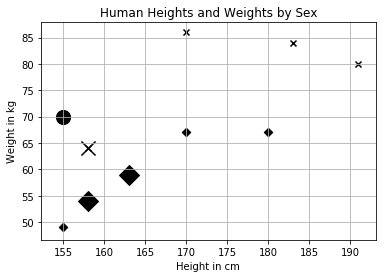

In [5]:
# plot for fig2
import numpy as np
import matplotlib.pyplot as plt

X_train = np.array([
    [158, 64],
    [170, 86],
    [183, 84],
    [191, 80],
    [155, 49],
    [163, 59],
    [180, 67],
    [158, 54],
    [170, 67]
])
y_train = ['male', 'male', 'male', 'male', 'female', 'female', 'female', 'female', 'female']

plt.figure()
plt.title('Human Heights and Weights by Sex')
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')

for i, x in enumerate(X_train):
    plt.scatter(x[0], x[1], c='k', marker='x' if y_train[i] == 'male' else 'D')
plt.scatter(158, 64, s=200, c='k', marker='x')
plt.scatter(163, 59, s=200, c='k', marker='D')
plt.scatter(158, 54, s=200, c='k', marker='D')
plt.scatter(155, 70, s=200, c='k', marker='o')
plt.grid(True)
plt.show()

三个与预测样本最为邻近的样本，其中两个是女性，一个是男性。 因此，我们可以判断预测样本是女性。

现在我们使用scikit-learn来实现一个KNN分类器：

In [6]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.neighbors import KNeighborsClassifier

lb = LabelBinarizer()
y_train_binarized = lb.fit_transform(y_train)
y_train_binarized

array([[1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0]])

In [7]:
K = 3
clf = KNeighborsClassifier(n_neighbors=K)
clf.fit(X_train, y_train_binarized.reshape(-1))
prediction_binarized = clf.predict(np.array([155, 70]).reshape(1, -1))[0]
predicted_label = lb.inverse_transform(prediction_binarized)
predicted_label

array(['female'], 
      dtype='<U6')

本案例中用到的标签是字符串。我们首先使用`LabelBinarizer`将它们转换为整数。`LabelBinarizer`实现了数据类型转换接口，它涉及到`fit`，`transform`和`fit_transform`等方法。`fit`方法为数据类型转换提供了准备，实际上它实现的是从标签字符串到整数的映射。`transform`方法将转换映射对输入标签进行了操作。`fit_transform`方法是一种方便的调用`fit`和`transform`的方法。数据类型转换应仅适用于训练集。如果单独进行训练和测试集的拟合和转换，可能导致从标签到整数的映射不一致的情况发生。也就是说，在本案例中，不一致可能表现为男性可能会在训练集中映射为1，而在测试集中映射为0。另外，还应避免对整个数据集进行拟合，因为对于某些数据类型转换，有可能会将有关测试集的信息泄漏给模型，导致诸如过拟合现象的发生，导致基于测试集的预测性能测量可能非常乐观，但事实上其泛化能力可能存在问题。降低预测模型应对实际需要的能力。在后面的内容中讲到从文本中提取特征的时侯我们会更多地讨论这个值得注意的隐患。

下面，我们来对`KNeighborsClassifier`进行初始化。 即使KNN是一个惰性的学习算法，也需要进行估计器的实现。我们调用`fit`和`predict`的方式跟我们之前进行简单线性回归时一样。在学习的最后阶段，我们可以使用我们拟合出的`LabelBinarizer`来反转转换并将整数映射为一个字符串标签返回值。 现在我们来使用我们的分类器对测试数据进行预测，并对这个预测器的性能进行评估。

### 测试数据

|Height|Weight|Label|
|--|--|--|
|168 cm|65 kg|male|
|180 cm|96 kg|male|
|160 cm|52 kg|female|
|169 cm|67 kg|female|

In [8]:
X_test = np.array([
    [168, 65],
    [180, 96],
    [160, 52],
    [169, 67]
])
y_test = ['male', 'male', 'female', 'female']
y_test_binarized = lb.transform(y_test)
print('Binarized labels: %s' % y_test_binarized.T[0])

predictions_binarized = clf.predict(X_test)
print('Binarized predictions: %s' % predictions_binarized)
print('Predicted labels: %s' % lb.inverse_transform(predictions_binarized))

Binarized labels: [1 1 0 0]
Binarized predictions: [0 1 0 0]
Predicted labels: ['female' 'male' 'female' 'female']


通过将我们的测试标签与我们的分类器的预测进行比较，我们发现它的错误地预测了其中一个测试样本，预测为男性，而测试实例是女性。这里稍微回顾一下前一章的内容，我们在机器学习基础中提到，二叉分类任务可能会出现两种类型的错误：假阳性和假阴性。机器学习中有许多性能指标用于对分类器进行评估，根据应用中错误类型的后果来采取合适的评估方式非常重要，不同的评估方法有不同的适用环境。下面，我们将使用几种常见的性能指标来评估我们刚刚建构的分类器，这些指标包括准度、精度和召回率。

### 准度

准度是正确分类的测试实例的比例，我们刚才建构的这个预测模型在测试集上的表现为四个样本有一个错误预测，所以准度是75％。

In [9]:
from sklearn.metrics import accuracy_score
print('Accuracy: %s' % accuracy_score(y_test_binarized, predictions_binarized))

Accuracy: 0.75


### 精度

精度是预测为真正为阳性的测试实例的比例。在本例中，阳性的类别是男性。 男，女分属于阳性还是阴性，这个分类在这里是任意分配的，完全可以对换。 我们的分类器预测出其中一个测试实例是阳性的类，这个实例正好也是真正的阳性类，所以分类器的精度是100％。

In [10]:
from sklearn.metrics import precision_score
print('Precision: %s' % precision_score(y_test_binarized, predictions_binarized))

Precision: 1.0


### 召回率

召回率是指预测为阳性样本占的真阳性样本的比例。我们的分类器预测出了两个真阳性样本中的一个，因此其召回率为50％。

In [11]:
from sklearn.metrics import recall_score
print('Recall: %s' % recall_score(y_test_binarized, predictions_binarized))

Recall: 0.5


### F1度量

这里我们还可以通过一个称为__F1分值__或__F1度量__的统计量来评价预测模型的性能，__F1__是对精度和召回率的总评， __F1度量__是精度和召回的调和平均数（harmonic mean），又称倒数平均数。

In [12]:
from sklearn.metrics import f1_score
print('F1 score: %s' % f1_score(y_test_binarized, predictions_binarized))

F1 score: 0.666666666667


值得注意的是，精度和召回率的算术平均值是__F1__分值的上限。 __F1__分值会随着精度和召回率之间的差异而增加，从而惩罚分类器。另外，__ Matthews correlation coefficient马修斯相关系数（MCC）__是衡量二进制分类器性能的__F1分数__的替代方法（__MCC__是表征数据对某一特征分类的关联性的，其值在[-1，1]，-1代表完全相悖的预测；1代表完全正确的预测；0代表随机预测）。一个完美的分类器的__MCC__是1。一个简单的分类器，随机地预测得分0，一个完全错误的分类器将得分-1。即使测试集中样本的类别分布的比例严重不平衡，__MCC__也是有用的。

In [13]:
from sklearn.metrics import matthews_corrcoef
print('Matthews correlation coefficient: %s' % matthews_corrcoef(y_test_binarized, predictions_binarized))

Matthews correlation coefficient: 0.57735026919


scikit-learn中提供了一个非常方面的函数__classification_report__来输出__精度__、__召回率__和__F1值__。下面是调用方法。

In [14]:
from sklearn.metrics import classification_report
print(classification_report(y_test_binarized, predictions_binarized, target_names=['male'], labels=[1]))

             precision    recall  f1-score   support

       male       1.00      0.50      0.67         2

avg / total       1.00      0.50      0.67         2



## 应用2：基于KNN的回归

接下来，我们试着用KNN完成一个回归任务。在这里，我们将利用一个个体的身高和性别数据对其体重进行预测。下面列出来训练数据集和测试数据集。

## 训练数据集

|Height|Sex|Weight|
|--|--|--|
|158 cm|male|64 kg|
|170 cm|male|66 kg|
|183 cm|male|84 kg|
|191 cm|male|80 kg|
|155 cm|female|49 kg|
|163 cm|female|59 kg|
|180 cm|female|67 kg|
|158 cm|female|54 kg|
|170 cm|female|67 kg|

## 测试数据集

|Height|Sex|Weight|
|--|--|--|
|160 cm|male|66 kg|
|196 cm|male|87 kg|
|168 cm|female|68 kg|
|177 cm|female|74 kg|

我们将实例化并拟合`KNeighborsRegressor`，并使用它来预测体重。这个数据集里的性别特征已被编码为二进制值。值得注意的是，性别特征的取值范围是从`0`到`1`，而样本身高特征的取值范围则是从`155`到`191`。我们将在下一节讨论为什么这是一个问题，以及如何改进。 在房屋价格的案例中，我们使用决定系数R^2来衡量我们的模型的表现。这个例子中，也会将使用它来再次测量回归函数的性能，并还会对回归性能的评价引入平均绝对误差（__MAE__）和均方误差（__MSE__）这两个性能指标，这样我们就可以接触到更为丰富多样的评价指标。以备不时之需。

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor

X_train = np.array([
    [158, 64, 1],
    [170, 86, 1],
    [183, 84, 1],
    [191, 80, 1],
    [155, 49, 0],
    [163, 59, 0],
    [180, 67, 0],
    [158, 54, 0],
    [170, 67, 0]
])
y_train = [7, 12, 29, 18, 11, 16, 29, 22, 36]

X_test = np.array([
    [160, 66, 1],
    [196, 87, 1],
    [168, 68, 0],
    [177, 74, 0]
])
y_test = [9, 13, 26, 21]

K = 1
clf = KNeighborsRegressor(n_neighbors=K)
clf.fit(X_train, y_train)
predictions = clf.predict(np.array(X_test))
predictions

array([  7.,  18.,  36.,  29.])

In [16]:
from sklearn.metrics import r2_score
print(r2_score(y_test, predictions))

-0.0919377652051


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

X_train = np.array([
    [158, 1],
    [170, 1],
    [183, 1],
    [191, 1],
    [155, 0],
    [163, 0],
    [180, 0],
    [158, 0],
    [170, 0]
])
y_train = [64, 86, 84, 80, 49, 59, 67, 54, 67]

X_test = np.array([
    [160, 1],
    [196, 1],
    [168, 0],
    [177, 0]
])
y_test = [66, 87, 68, 74]

K = 3
clf = KNeighborsRegressor(n_neighbors=K)
clf.fit(X_train, y_train)
predictions = clf.predict(np.array(X_test))

print('Predicted weights: %s' % predictions)
print('Actual weights: %s' % y_test)

print('Coefficient of determination: %s' % r2_score(y_test,predictions))
print('Mean absolute error: %s' % mean_absolute_error(y_test,predictions))
print('Mean squared error: %s' % mean_squared_error(y_test,predictions))

Predicted weights: [ 59.          77.          70.66666667  72.66666667]
Actual weights: [66, 87, 68, 74]
Coefficient of determination: 0.412506459948
Mean absolute error: 5.25
Mean squared error: 39.4722222222


In [18]:
from sklearn.metrics import r2_score
print(r2_score(y_test, predictions))

0.412506459948


### MAE和MSE/MSD

__MAE__是预测误差绝对值的平方和，__MAE__的计算公式如下。

$ MAE = \frac{1}{n}\sum_{i=0}^{n-1}{|{y_i}-{\hat{y}_i}|} $

__MSE__，或者均方差__MSD__，是一个比__MAE__更为普及的度量指标。计算公式如下。__MSE__是预测误差平方和的平均值。

$ MSE = \frac{1}{n}\sum_{i=0}^{n-1}{({y_i}-{\hat{y}_i})^2} $

回归的性能评价标准不对误差的方向加以考虑是重要的,否则回归带来的预测误差的正负值会相互抵消,是的性能评价不符合实际情况。 __MSE__和__MAE__分别通过平均误差和绝对值来实现。__MSE__惩罚异常值的强度要超过__MAE__;将一个大误差平方化使它对总误差的贡献不成比例。这在某些问题中可能是可取的，但__MSE__指标在回归性能的评估指标中通常是首选的，因为__MSE__具有有用的数学性质。这里再次提醒一下，普通线性回归（如前一章简单线性回归问题）的思想就是为了使__MSE__的平方根最小化而进行拟合。

## 特征缩放

当特征值取值相近时，许多学习算法通常会有更好的表现。比如在之前的案例中，我们使用了两个特征：一个代表人的性别的二叉特征（取值范围[0,1]）和一个连续值的特征，代表人的身高（cm）。设想一下，有一个数据集，我们有一个170厘米高的男人和一个160厘米高的女人。对一个身高164厘米高的个体而言，这个个体是更接近女性还是男性？对于体重预测案例而言，我们可能更加偏向于这个个体为男性多一些.在预测体重的时候，高度特征上6厘米的差异所具有的影响力应该小于性别的差异所导致的影响。另外，如果我们测定高度的数据采用不同的单位，比如米、厘米甚至毫米，还是致使数据发生很大的改变，导致以距离测量为判断依据的KNN算法出现很大的偏差。

In [19]:
from scipy.spatial.distance import euclidean

# heights in millimeters
X_train = np.array([[1700, 1],[1600, 0]])

x_test = np.array([1640, 1]).reshape(1, -1)

print(euclidean(X_train[0, :], x_test))
print(euclidean(X_train[1, :], x_test))

# heights in meters
X_train = np.array([[1.7, 1],[1.6, 0]])

x_test = np.array([164, 1]).reshape(1, -1)

print(euclidean(X_train[0, :], x_test))
print(euclidean(X_train[1, :], x_test))

60.0
40.0124980475
162.3
162.40307878855006


`scikit-learn`的`standardscaler`是个用了对数据的尺度进行标准化的转换接口，通过对特征进行尺度调节使特征数据为单位方差。`standardscaler`首先通过从每个实例的特征值中减去每个特征的平均值来进行特征标定。然后通过将每个实例的值除以特征的标准偏差来对特征进行缩放。这使得数据标准化为具有零均值和单位方差。像之前接触到的`LabelBinarizer`一样，`standardscaler`实现数据转换。

这里我们可以对刚才的那个案例中的数据进行规范化处理，再进行拟合和回归，同时也比较两种模型的性能。

In [25]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

X_train_scaled = ss.fit_transform(X_train)

print(X_train)
print(X_train_scaled)

X_test_scaled = ss.transform(X_test)

clf.fit(X_train_scaled, y_train)

predictions = clf.predict(X_test_scaled)

print('Predicted wieghts: %s' % predictions)
print('Coefficient of determination: %s' % r2_score(y_test,predictions))
print('Mean absolute error: %s' % mean_absolute_error(y_test,predictions))
print('Mean squared error: %s' % mean_squared_error(y_test,predictions))

[[ 1.7  1. ]
 [ 1.6  0. ]]
[[ 1.  1.]
 [-1. -1.]]


C:\Users\lymanZHANG\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


ValueError: Found input variables with inconsistent numbers of samples: [2, 9]

可以看出，数据经过标准化后，我们的模型表现要好很多。性别特征对模型的预测施加的影响更大，有助于模型做出更好的预测。

## 单元知识总结

本知识单元中引入了__KNN__，一个简单但是非常强大的机器学习算法，可以用于实现一些分类和回归任务。__KNN__是一种惰性学习算法，属于非参数模型。该算法不是基于固定的参数在学习训练集数据的基础上进行预测，而是在对所有实例样本与预测样本进行距离计算的基础上，找出与预测样本最为邻近的k个样本，将这k个样本的相关属性作为目标样本的预测属性。本单元通过相关案例进行了基于__KNN__的分类和回归实践，并引入了__scikit-learn__中的数据转换接口，比如调用`LabelBinarizer`将文本串转换为二叉标签，调用`StandardScaler`进行数据的标准化以提高模型的表现。